In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from google.colab import drive

drive.mount('/content/drive')
BASE_MODELS_PATH = '/content/drive/MyDrive/inDrive_hackathon/models'
RUN1_PATH = os.path.join(BASE_MODELS_PATH, 'damage_detection_run1', 'results.csv')
RUN2_PATH = os.path.join(BASE_MODELS_PATH, 'damage_detection_run2_debiased', 'results.csv')


df_run1 = pd.read_csv(RUN1_PATH)
df_run1.columns = df_run1.columns.str.strip()

df_run2 = pd.read_csv(RUN2_PATH)
df_run2.columns = df_run2.columns.str.strip()

print("✅ DataFrames loaded successfully.")
print("\n--- Columns for Run 1 ---")
print(df_run1.columns)
print("\n--- Columns for Run 2 ---")
print(df_run2.columns)

Mounted at /content/drive
✅ DataFrames loaded successfully.

--- Columns for Run 1 ---
Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')

--- Columns for Run 2 ---
Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


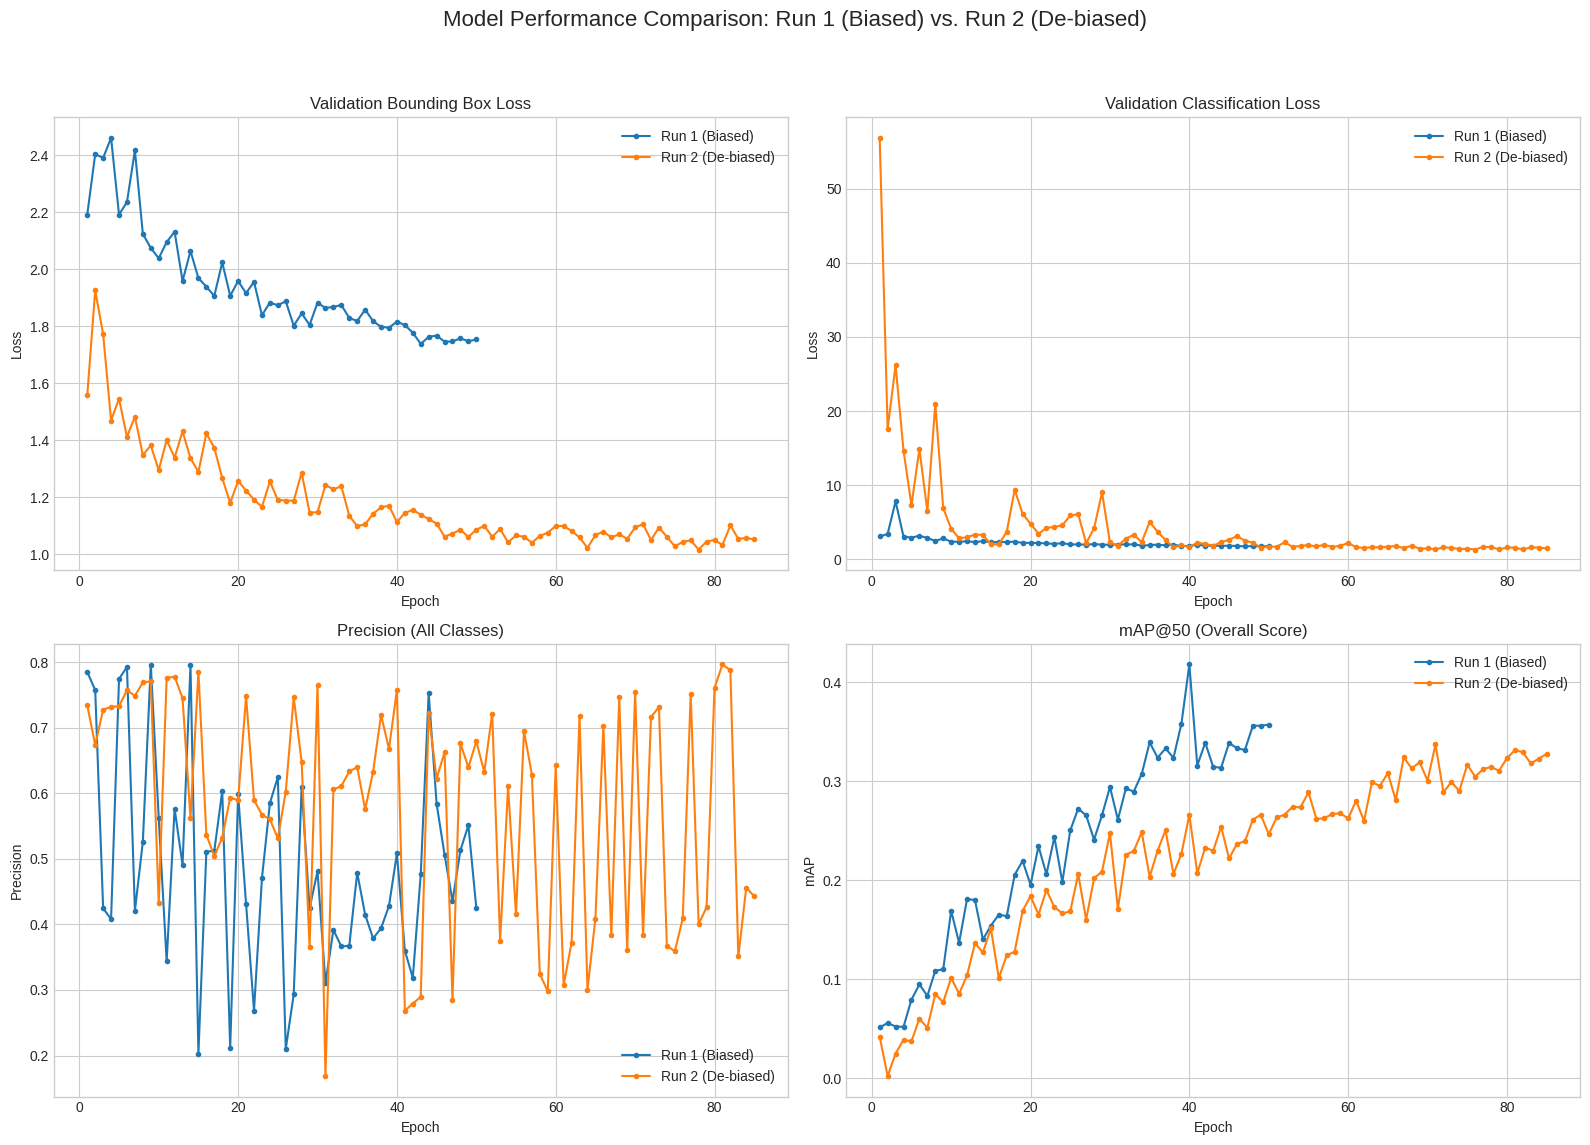


--- Final Performance ---
Best mAP@50 for Run 1 (Biased): 0.4178
Best mAP@50 for Run 2 (De-biased): 0.3370


In [ ]:


plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Model Performance Comparison: Run 1 (Biased) vs. Run 2 (De-biased)', fontsize=16)


axes[0, 0].plot(df_run1['epoch'], df_run1['val/box_loss'], label='Run 1 (Biased)', marker='.')
axes[0, 0].plot(df_run2['epoch'], df_run2['val/box_loss'], label='Run 2 (De-biased)', marker='.')
axes[0, 0].set_title('Validation Bounding Box Loss')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()


axes[0, 1].plot(df_run1['epoch'], df_run1['val/cls_loss'], label='Run 1 (Biased)', marker='.')
axes[0, 1].plot(df_run2['epoch'], df_run2['val/cls_loss'], label='Run 2 (De-biased)', marker='.')
axes[0, 1].set_title('Validation Classification Loss')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()


axes[1, 0].plot(df_run1['epoch'], df_run1['metrics/precision(B)'], label='Run 1 (Biased)', marker='.')
axes[1, 0].plot(df_run2['epoch'], df_run2['metrics/precision(B)'], label='Run 2 (De-biased)', marker='.')
axes[1, 0].set_title('Precision (All Classes)')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].legend()


axes[1, 1].plot(df_run1['epoch'], df_run1['metrics/mAP50(B)'], label='Run 1 (Biased)', marker='.')
axes[1, 1].plot(df_run2['epoch'], df_run2['metrics/mAP50(B)'], label='Run 2 (De-biased)', marker='.')
axes[1, 1].set_title('mAP@50 (Overall Score)')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('mAP')
axes[1, 1].legend()


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


final_map_run1 = df_run1['metrics/mAP50(B)'].max()
final_map_run2 = df_run2['metrics/mAP50(B)'].max()

print(f"\n--- Final Performance ---")
print(f"Best mAP@50 for Run 1 (Biased): {final_map_run1:.4f}")
print(f"Best mAP@50 for Run 2 (De-biased): {final_map_run2:.4f}")